In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.shape

(10841, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


# Data Cleaning

In [7]:
df_copy=df.copy()

## Checking for Missing values

In [9]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

#### # Insights and Observations
The dataset has missing values 


In [11]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


## Checking for Duplicated rows

In [13]:
df.duplicated().sum()

483

In [14]:
df[df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


#### # Removing(deleting) the duplicate data 

In [16]:
df_copy = df.drop_duplicates(keep='last')

In [17]:
df_copy.duplicated().sum()

0

## Checking and Coverting data types 

In [19]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### 1. Reviews column

In [22]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [23]:
df['Reviews'].str.isnumeric().sum()

10840

#### **#Insights :**
 1. This shows that out of 10841 only 10840 entries in the Reviews column consist only of numeric characters.
 
 2. That means that 1 row has invalid input in Reviews column

In [25]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [26]:
df_copy = df_copy.drop(10472)

In [27]:
df_copy[~df_copy['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [28]:
df_copy['Reviews'].dtype

dtype('O')

#### # Converting the data type to integer

In [30]:
df_copy['Reviews']=df_copy['Reviews'].astype(int)

In [31]:
df_copy.Reviews.dtype

dtype('int32')

### 2. Size column

In [33]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

#### # Replacing K and M  to 0,to get numeric value . Any other string input will become NaN

In [35]:
df_copy['Size']=df_copy['Size'].str.upper()

df_copy['Size']=df_copy['Size'].str.replace('M','000',regex=False)
df_copy['Size']=df_copy['Size'].str.replace('K','',regex=False)
df_copy['Size']=df_copy['Size'].replace('VARIES WITH DEVICE',np.nan ,regex=False)

In [36]:
df_copy['Size'].unique()

array(['19000', '14000', '8.7000', '25000', '2.8000', '5.6000', '29000',
       '33000', '3.1000', '28000', '12000', '20000', '21000', '37000',
       '2.7000', '5.5000', '17000', '39000', '31000', '4.2000', '7.0000',
       '23000', '6.0000', '6.1000', '4.6000', '9.2000', '5.2000', '11000',
       '24000', nan, '9.4000', '15000', '10000', '1.2000', '26000',
       '8.0000', '7.9000', '56000', '57000', '35000', '54000', '201',
       '3.6000', '5.7000', '8.6000', '2.4000', '27000', '2.5000', '16000',
       '3.4000', '8.9000', '3.9000', '2.9000', '38000', '32000', '5.4000',
       '18000', '1.1000', '2.2000', '4.5000', '9.8000', '52000', '9.0000',
       '6.7000', '30000', '2.6000', '7.1000', '3.7000', '22000', '7.4000',
       '6.4000', '3.2000', '8.2000', '9.9000', '4.9000', '9.5000',
       '5.0000', '5.9000', '13000', '73000', '6.8000', '3.5000', '4.0000',
       '2.3000', '7.2000', '2.1000', '42000', '7.3000', '9.1000', '55000',
       '23', '6.5000', '1.5000', '7.5000', '46000', 

#### # Converting data type

In [38]:
df_copy['Size']=pd.to_numeric(df_copy['Size'])

In [39]:
df_copy['Size'].dtype

dtype('float64')

In [40]:
df_copy['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10357, dtype: float64

### 3. Last Updated column

In [42]:
df_copy['Last Updated']=pd.to_datetime(df_copy['Last Updated'])

In [43]:
df_copy['Last Updated'].head()

0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
Name: Last Updated, dtype: datetime64[ns]

#### # Extracting day,month and year as diff columns

In [45]:
df_copy['Day']=df_copy['Last Updated'].dt.day
df_copy['Month']=df_copy['Last Updated'].dt.month
df_copy['Year']=df_copy['Last Updated'].dt.year

### 4. Current Ver & Updated Ver column

#### # Replacing 'Varies with device' with NaN

In [48]:
df_copy['Current Ver']=df_copy['Current Ver'].replace('Varies with device',np.nan)
df_copy['Android Ver']=df_copy['Android Ver'].replace('Varies with device',np.nan)

#### # Creating a minimum android version column to store the minimum version values 

In [50]:
df_copy['Min Android Ver']=df_copy['Android Ver'].str.replace('and up','').str.split('-').str[0].str.strip()
df_copy

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year,Min Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,NaN,4.2 and up,8,6,2018,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,"5,000+",Free,0,Everyone,Education,2017-07-25,1.48,4.1 and up,25,7,2017,4.1
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,Education,2018-07-06,1.0,4.1 and up,6,7,2018,4.1
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,"1,000+",Free,0,Everyone,Medical,2017-01-20,1.0,2.2 and up,20,1,2017,2.2
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,2015-01-19,NaN,NaN,19,1,2015,NaN


### 5. Installs & Price columns

In [52]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [53]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

#### # Removing [+ , $] characters

In [55]:
char=['+',',','$']
cols=['Installs','Price']

for i in char:
    for j in cols:
        df_copy[j]=df_copy[j].str.replace(i,'',regex=False)

In [56]:
df_copy['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [57]:
df_copy['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '1.00', '2.49', '10.99',
       '1.50', '14.99', '15.99', '79.99', '9.00', '24.99', '10.00',
       '16.99', '11.99', '29.99', '74.99', '5.49', '33.99', '12.99',
       '39.99', '19.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

#### # Coverting the data type

In [59]:
df_copy['Installs']=df_copy['Installs'].astype(int)
df_copy['Price']=df_copy['Price'].astype(float)

In [60]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10840
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   App              10357 non-null  object        
 1   Category         10357 non-null  object        
 2   Rating           8892 non-null   float64       
 3   Reviews          10357 non-null  int32         
 4   Size             8831 non-null   float64       
 5   Installs         10357 non-null  int32         
 6   Type             10356 non-null  object        
 7   Price            10357 non-null  float64       
 8   Content Rating   10357 non-null  object        
 9   Genres           10357 non-null  object        
 10  Last Updated     10357 non-null  datetime64[ns]
 11  Current Ver      9047 non-null   object        
 12  Android Ver      9134 non-null   object        
 13  Day              10357 non-null  int32         
 14  Month            10357 non-null  int32     

## Handling Missing Values

#### # Size column

In [63]:
df_copy['Size'].isnull().value_counts()

Size
False    8831
True     1526
Name: count, dtype: int64

It contains 1526 null values

<Axes: xlabel='Size', ylabel='Count'>

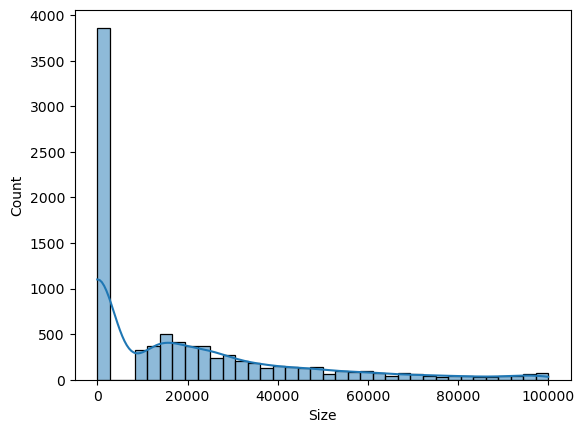

In [65]:
sns.histplot(df_copy['Size'],kde=True)

**Insights :** The distribution is not normal, as it is highly right-skewed with a long tail and lacks symmetry.

**Applying Median Imputation**

In [68]:
df_copy['Size']=df_copy['Size'].fillna(df_copy['Size'].median())
df_copy[['Size']]

,Size
0,19000.0
1,14000.0
2,8.7
3,25000.0
4,2.8
...,...
10836,53000.0
10837,3.6
10838,9.5
10839,13000.0


In [69]:
df_copy['Size'].isnull().sum()

0

#### # Rating Column

<Axes: xlabel='Rating', ylabel='Count'>

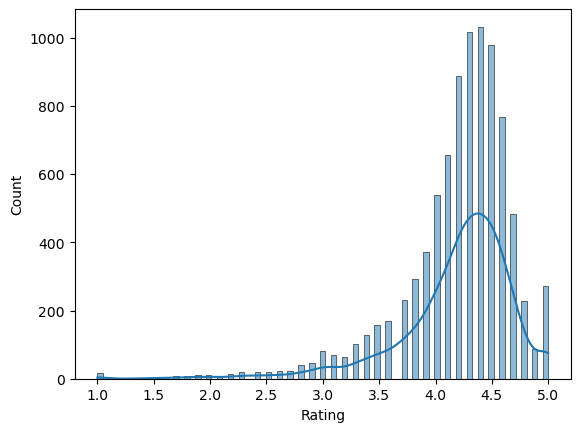

In [71]:
sns.histplot(df_copy['Rating'],kde=True)

**Applying Median Imputation**

In [73]:
df_copy['Rating']=df_copy['Rating'].fillna(df_copy['Rating'].median())
df_copy['Rating'].isnull().sum()

0

#### # Type Column

In [75]:
df_copy[df_copy['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year,Min Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.3,0,13000.0,0,NaN,0.0,Everyone 10+,Strategy,2018-06-28,NaN,NaN,28,6,2018,NaN


**Only 1 null value.** **Hence dropping this row**

In [77]:
df_copy=df_copy.drop(9148)
df_copy['Type'].isnull().sum()

0

#### # Current Ver column

**Applying Mode Imputation**

In [80]:
(df_copy['Min Android Ver'].mode()[0])

'4.1'

In [81]:
df_copy['Current Ver']=df['Current Ver'].fillna(df_copy['Current Ver'].mode()[0])

In [82]:
df_copy['Current Ver'].isnull().sum()

0

#### # Minimum Android Ver column

**Applying Mode Imputation**

In [85]:
(df_copy['Min Android Ver'].mode()[0])

'4.1'

In [86]:
df_copy['Min Android Ver']=df_copy['Min Android Ver'].fillna(df_copy['Min Android Ver'].mode()[0])

In [87]:
df_copy['Min Android Ver'].isnull().sum()

0

In [88]:
df_copy.isnull().sum()

App                   0
Category              0
Rating                0
Reviews               0
Size                  0
Installs              0
Type                  0
Price                 0
Content Rating        0
Genres                0
Last Updated          0
Current Ver           0
Android Ver        1222
Day                   0
Month                 0
Year                  0
Min Android Ver       0
dtype: int64

**No Missing values**

### Duplicates in App column 
#### This column must have unique values, this is like a primary key for this dataset.

In [91]:
df_copy.shape

(10356, 17)

In [92]:
df_copy[df_copy.duplicated('App')].shape

(698, 17)

In [93]:
df_copy=df_copy.drop_duplicates(subset='App',keep='first')

In [94]:
df_copy.shape

(9658, 17)

# Explore Data

## Feature Types:

**1. Numerical Features** - Rating,Reviews,Size,Installs,Price,Last Updated,Day,Month,Year

**2. Categorical Features** - App, Category,Type,Content Rating,Genres,Current Ver,Android Ver,Min Android Ver

## Feature Information
1. App :- Name of the App
2. Category :- Category under which the App falls.
3. Rating :- Application's rating on playstore
4. Reviews :- Number of reviews of the App.
5. Size :- Size of the App.
6. Install :- Number of Installs of the App
7. Type :- If the App is free/paid
8. Price :- Price of the app (0 if it is Free)
9. Content Rating :- Appropiate Target Audience of the App.
10. Genres:- Genre under which the App falls.
11. Last Updated :- Date when the App was last updated
12. Current Ver :- Current Version of the Application
13. Android Ver :- Android Version required to run the App
14. Min Android Ver :- Minimum Android Version required to run the App

#### # Re-Indexing columns

In [99]:
# Using reindex to re-index columns
df_copy = df_copy.reindex(columns=['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Day', 'Month', 'Year', 'Current Ver',
       'Android Ver','Min Android Ver'])

df_copy.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Day,Month,Year,Current Ver,Android Ver,Min Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,7,1,2018,1.0.0,4.0.3 and up,4.0.3


In [100]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9658 entries, 0 to 10840
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   App              9658 non-null   object        
 1   Category         9658 non-null   object        
 2   Rating           9658 non-null   float64       
 3   Reviews          9658 non-null   int32         
 4   Size             9658 non-null   float64       
 5   Installs         9658 non-null   int32         
 6   Type             9658 non-null   object        
 7   Price            9658 non-null   float64       
 8   Content Rating   9658 non-null   object        
 9   Genres           9658 non-null   object        
 10  Last Updated     9658 non-null   datetime64[ns]
 11  Day              9658 non-null   int32         
 12  Month            9658 non-null   int32         
 13  Year             9658 non-null   int32         
 14  Current Ver      9658 non-null   object     

In [101]:
df_copy.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Day,Month,Year,Current Ver,Android Ver,Min Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,7,1,2018,1.0.0,4.0.3 and up,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,15,1,2018,2.0.0,4.0.3 and up,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1,8,2018,1.2.4,4.0.3 and up,4.0.3


### #Univariate Analysis of Numerical Features

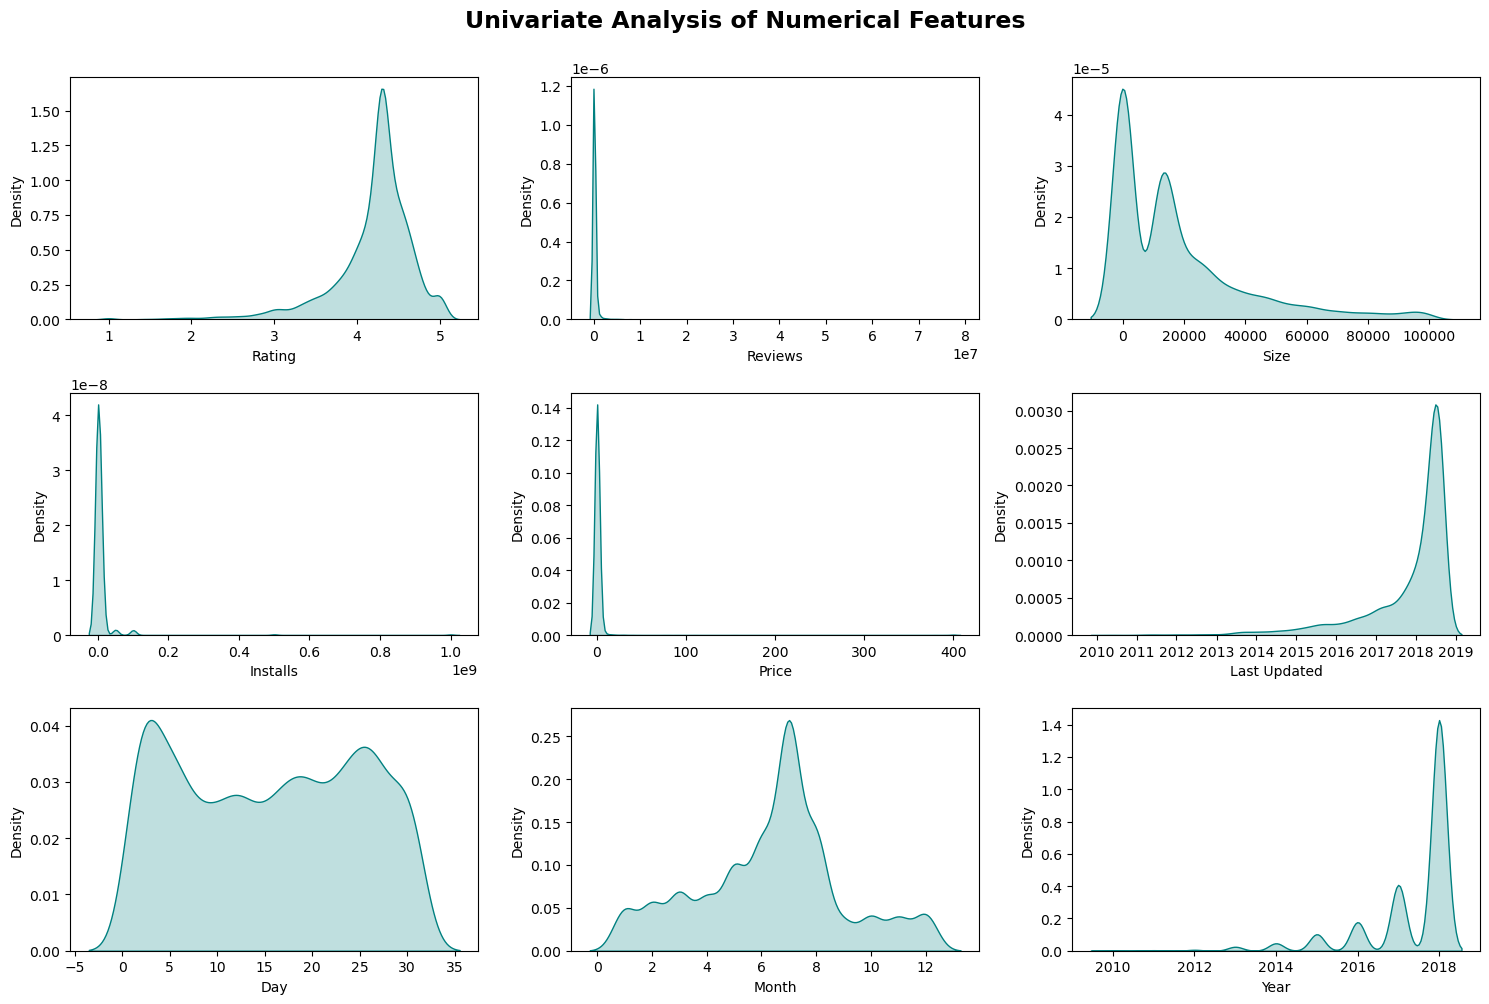

In [103]:
col=['Rating','Reviews','Size','Installs','Price','Last Updated','Day','Month','Year']

plt.figure(figsize=(15,10))
plt.suptitle('Univariate Analysis of Numerical Features',fontsize=17,fontweight='bold',y=1)

for idx, col_name in enumerate(col):
    plt.subplot(3, 3, idx + 1)
    sns.kdeplot(x=df_copy[col_name], color='teal',shade=True)
    plt.xlabel(col_name)
    plt.tight_layout()

plt.show()

### Observations : 
  1. Day and Month have a **normal distribution**
  2. Reviews, Size, Installs, Price are **right-skewed**
  3. Ratings, Last Updated, Year are **left-skewed**

### #Univariate Analysis of Categorical Features

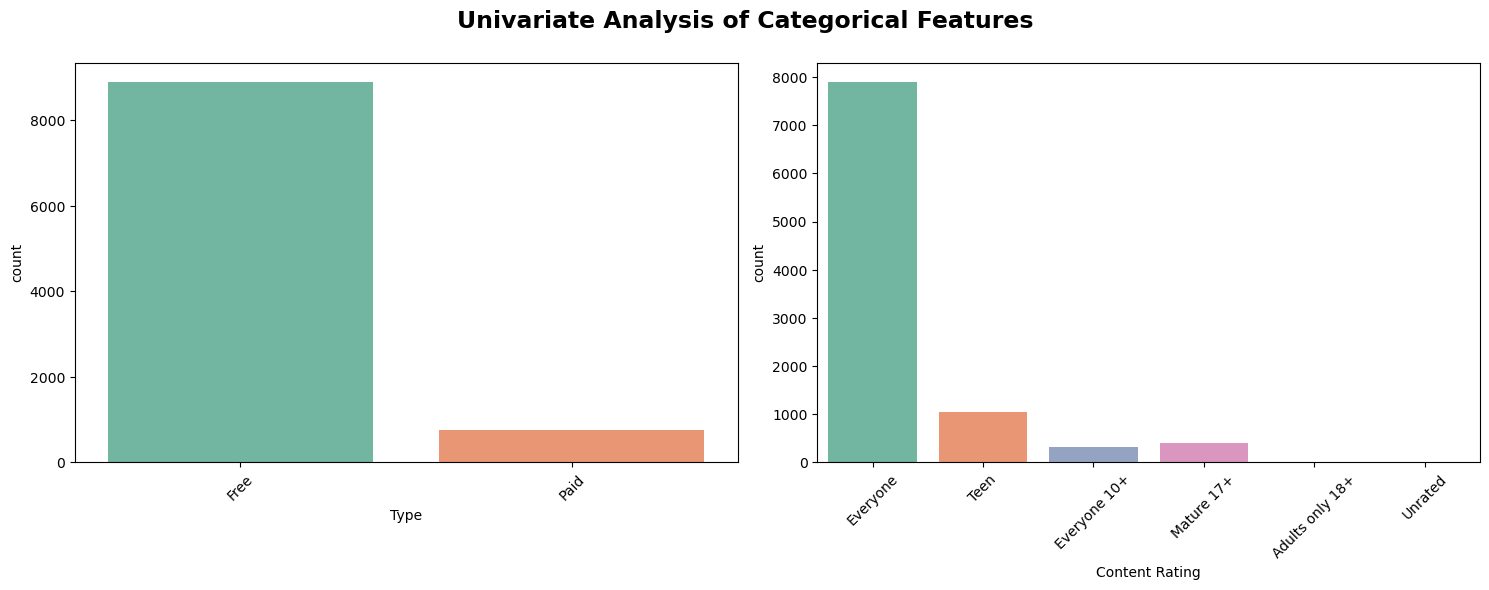

In [106]:
cols=['Type','Content Rating']

plt.figure(figsize=(15,10))
plt.suptitle('Univariate Analysis of Categorical Features',fontsize=17,fontweight='bold',y=1)

for idx, col_name in enumerate(cols):
    plt.subplot(2, 2, idx + 1)
    sns.countplot(x=df_copy[col_name],palette='Set2')
    plt.xlabel(col_name)
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

### Insights : 
    1. Free apps and Apps with content rating Everyone ,are more in appstore

Text(0.5, 1, 'Popular App Categories')

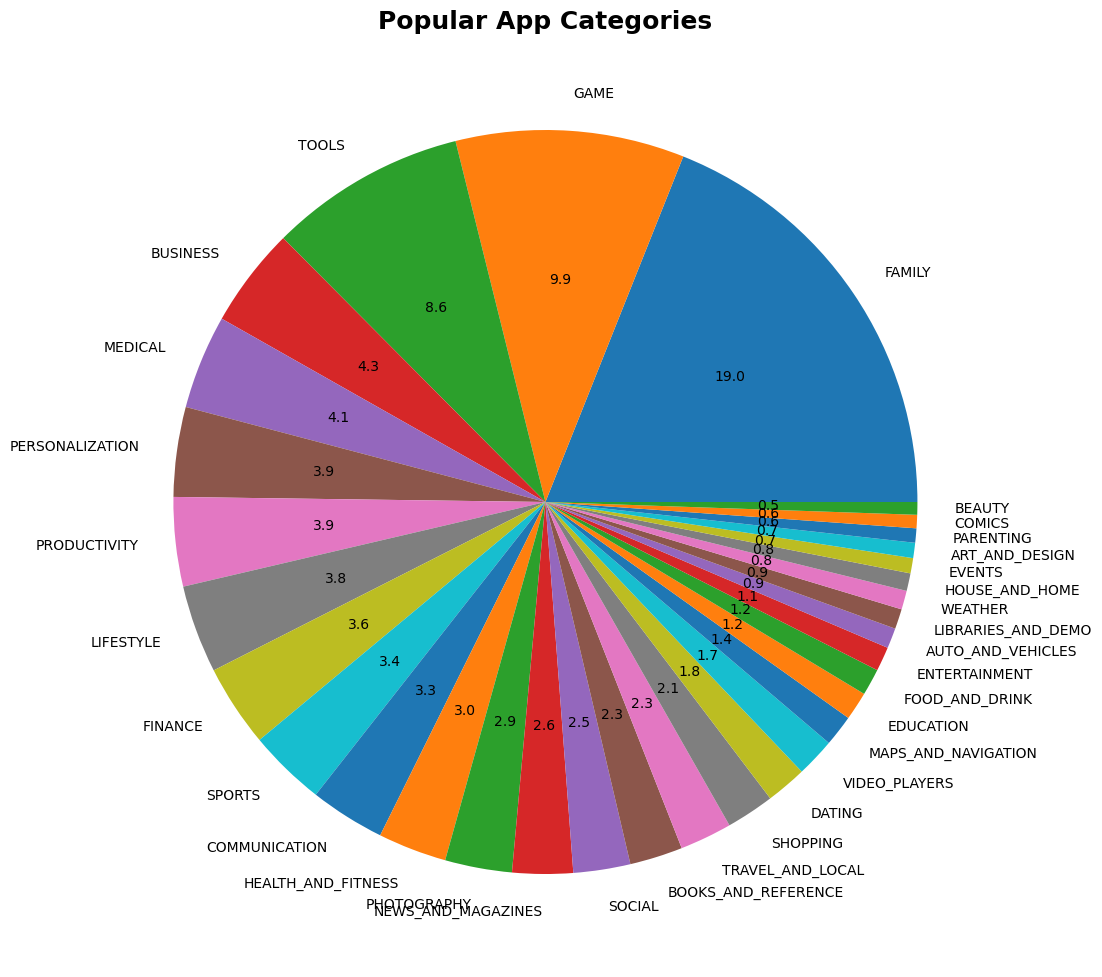

In [108]:
### Popular categories
count=df_copy['Category'].value_counts()
count

count.plot(kind='pie',y=df_copy['Category'],autopct='%1.1f',figsize=(12,18))
plt.ylabel('')
plt.title('Popular App Categories',fontweight='bold',fontsize=18,y=1)

### Insights : 
    1. Appstore mostly contains apps of categories Family,Games,Tools
    2. Apps of categories like Beauty,Comics,parenting,events etc. are very less in appstore

### Top 10 App Categories

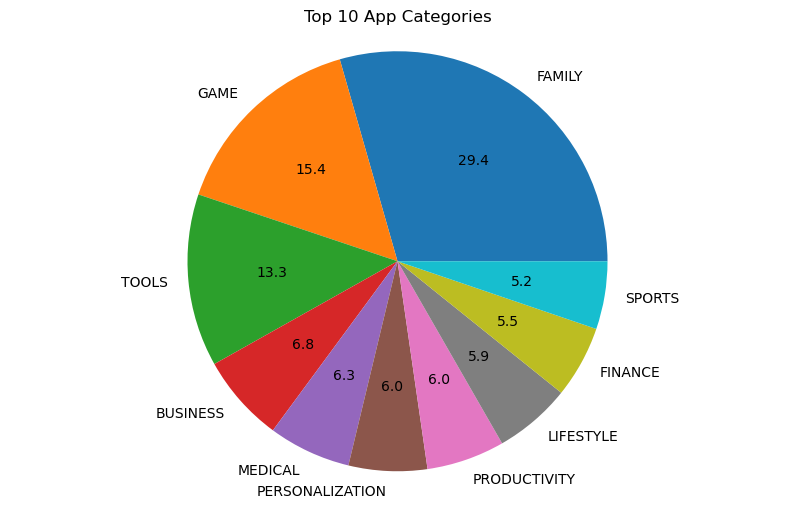

In [111]:
top_category=df_copy['Category'].value_counts().head(10)

top_category.plot.pie(autopct='%1.1f',figsize=(10,6))
plt.title("Top 10 App Categories")
plt.axis('equal')
plt.ylabel("")  
plt.show()

### Highest installed Categories

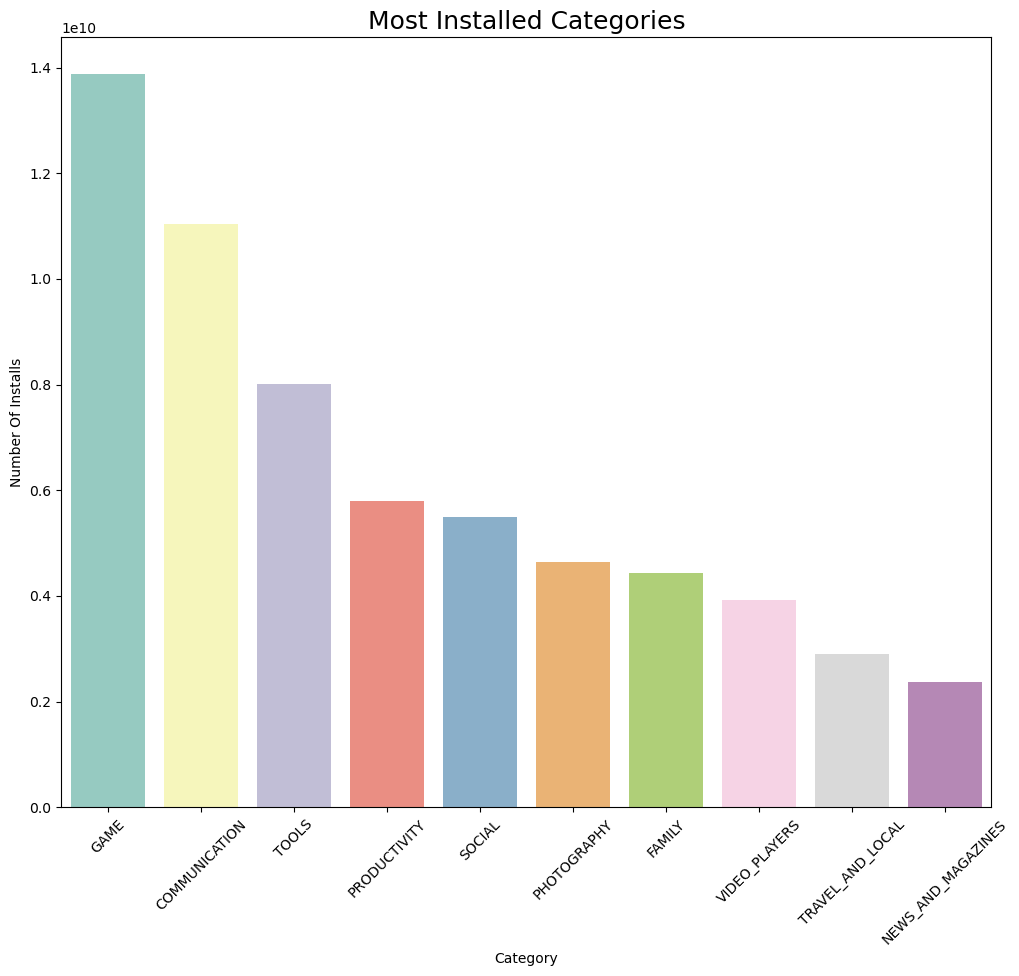

In [113]:
high_installs=df_copy.groupby(['Category'])['Installs'].sum().sort_values(ascending=False).head(10).reset_index()
high_installs.columns=['Category','Installs']

plt.figure(figsize = (12,10))
sns.barplot(x='Category',y='Installs',data=high_installs,palette='Set3')
plt.title('Most Installed Categories',size=18,y=1)
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.ylabel('Number Of Installs')
plt.show()

### Insights : 
1. Out of all the categories "GAME" has the most number of Installations.
2. With almost 35 Billion Installations GAME is the most popular Category in Google App store

### Most Installed Apps in each Category

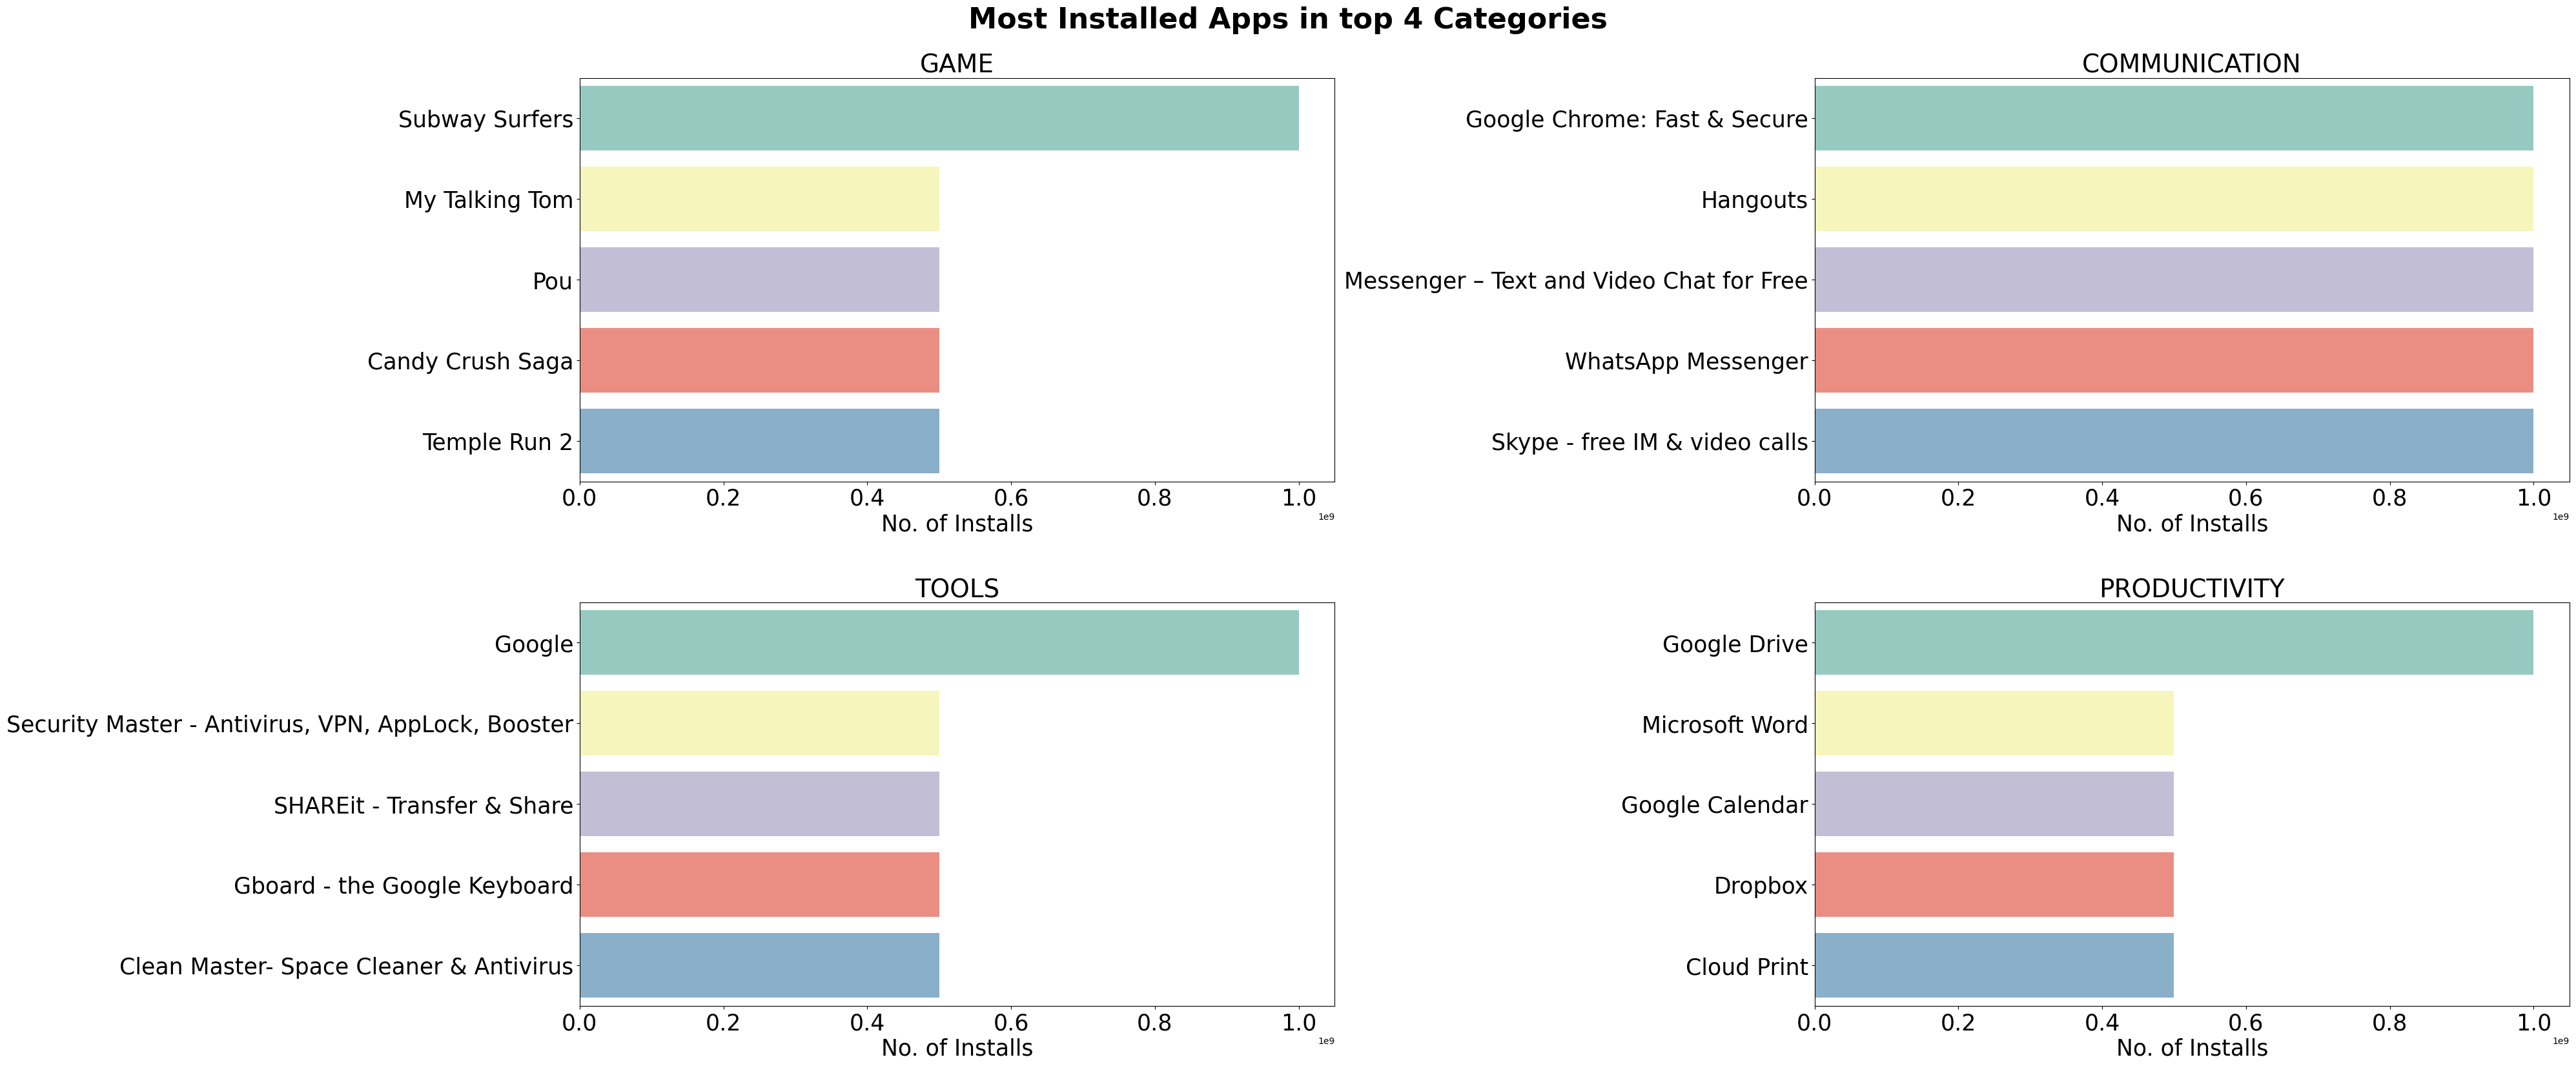

In [116]:
installs=(df_copy.groupby(['Category','App'])['Installs'].sum().reset_index())
installs=installs.sort_values('Installs',ascending=False)
cat=['GAME','COMMUNICATION','TOOLS','PRODUCTIVITY']

plt.figure(figsize=(40,40))
plt.suptitle('Most Installed Apps in top 4 Categories',size=32,weight='bold',y=1)
for i,value in enumerate(cat):
    df1=installs[installs['Category']==value]
    df2=df1.head(5)
    plt.subplot(5,2, i + 1)
    sns.barplot(x='Installs',y='App',data=df2, palette='Set3')
    plt.title(value,size=28)
    plt.xlabel('No. of Installs',size=25)
    plt.ylabel('')
    plt.yticks(size=25)
    plt.xticks(size=25)

plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()


### Insights
- Most popular game is Subway Surfers.
- Most popular communication app is Hangouts.
- Most popular productivity app is Google Drive.
- Most popular social app is Instagram.

### Apps with 5.0 ratings

In [119]:
rating = df_copy.groupby(['Category','Installs', 'App'])['Rating'].sum().sort_values(ascending = False).reset_index()

toprating_apps = rating[rating.Rating == 5.0]
toprating_apps=toprating_apps.head(10)
print("Number of 5 rated apps",toprating_apps.shape[0])


Number of 5 rated apps 10


In [120]:
toprating_apps.head(5)

,Category,Installs,App,Rating
0,HEALTH_AND_FITNESS,100,The CJ Rubric,5.0
1,SOCIAL,50,UP EB Bill Payment & Details,5.0
2,TOOLS,100,BK Formula Calculator,5.0
3,MEDICAL,1,KBA-EZ Health Guide,5.0
4,GAME,10,Trovami se ci riesci,5.0


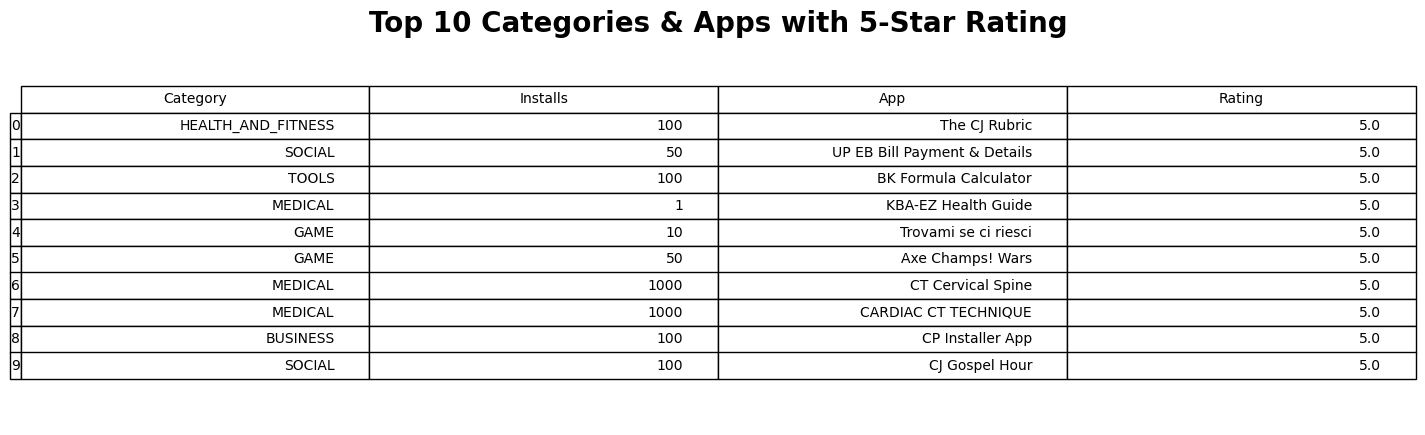

In [121]:
plt.figure(figsize=(15,5))
plt.axis('off')

table=plt.table(
    cellText=toprating_apps.values,
    colLabels=toprating_apps.columns,
    rowLabels=toprating_apps.index,
    loc='center'
)

table.scale(1.2, 1.6)
plt.title('Top 10 Categories & Apps with 5-Star Rating',size=20,weight='bold')
plt.show()


### Insights:
- There are 271 five rated apps on Google Play store
- Top most is 'CT Brain Interpretation' from 'Family' Category